In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df=pd.get_dummies(df,drop_first=True)


In [4]:
indep = df[['Age','EstimatedSalary','Gender_Male']]
dep = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=0.3, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gsv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
gsv.fit(X_train, y_train)
gsv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [7]:
decisionTreeClassifier = DecisionTreeClassifier(**gsv.best_params_)
decisionTreeClassifier.fit(X_train, y_train)
y_pred = decisionTreeClassifier.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        79
           1       0.92      0.83      0.87        41

    accuracy                           0.92       120
   macro avg       0.92      0.90      0.91       120
weighted avg       0.92      0.92      0.92       120



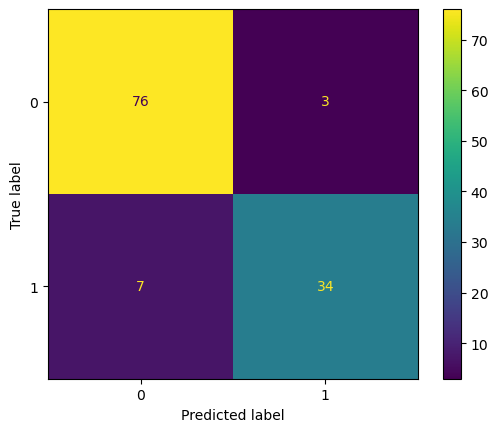

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cf).plot()

In [14]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64